# UCLA admissions prediction with Neural Networks on Keras

This notebook develops a Keras Neural Network model for predicting the admission from the UCLA admissions dataset.

Dataset can be found at : http://www.ats.ucla.edu/

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset

In [5]:
data = pd.read_csv('../dataset/ucla-admissions')
data.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


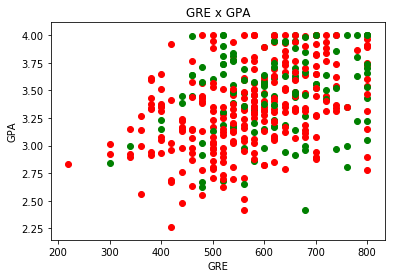

In [6]:
def plot_dataset(data, title=None):
        labels = {1: 'green', 0: 'red'}
        X = np.array(data[['gre','gpa']])
        y = np.array(data['admit'])
        for i in range(0, len(data)):
            plt.scatter(X[i][0], X[i][1], color=labels[y[i]])
        if title:
            plt.title(title)
        plt.xlabel("GRE")
        plt.ylabel("GPA")

plot_dataset(data, "GRE x GPA")
plt.show()

### Dataset preprocessing

In [7]:
# Transforms the rank column into one hot encoded columns
rank_one_hot = pd.get_dummies(data['rank'], prefix='rank')
# Add one hot encoded columns to main dataframe and 
# drop old categorical rank column
data = pd.concat([data, rank_one_hot], axis=1)
data = data.drop('rank', axis=1)
# Feature scalling
data['gre'] = data['gre'] / 800
data['gpa'] = data['gpa'] / 4.0
# Split dataset
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
train_data, test_data = data.iloc[sample], data.drop(sample)
# Split features and targets
x_train = train_data.drop('admit', axis=1)
y_train = train_data['admit']
x_test = test_data.drop('admit', axis=1)
y_test = test_data['admit']